In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [202]:
class CustomLinearRegression:
    def __init__(self, alpha: float, epoch: int) -> None:
        self.alpha = alpha
        self.epoch = epoch
        self.slope = None
        self.intercept = None
    
    def fit_gd(self, x_train: np.ndarray, y_train: np.ndarray) -> None:
        n = len(x_train.ravel())
        self.slope = 0
        self.intercept = 0 
        partial_derivative_slope = 0
        partial_derivative_intercept = 0
        for _ in range(self.epoch):
            for i in range(n):
                partial_derivative_slope += 2 * (x_train[i] * self.slope + self.intercept - y_train[i]) * x_train[i]
                partial_derivative_intercept += 2 * (x_train[i] * self.slope + self.intercept - y_train[i])
            self.slope -= self.alpha * partial_derivative_slope / n
            self.intercept -= self.alpha * partial_derivative_intercept / n
        
    def fit(self, x_train: np.ndarray, y_train: np.ndarray) -> None:
        numerator = 0
        denominator = 0
        data_points = x_train.shape[0]
        for i in range(data_points):
            numerator += (x_train[i] - x_train.mean()) * (y_train[i] - y_train.mean())

            denominator += ((x_train[i] - x_train.mean()) ** 2)
        self.slope = numerator / denominator
        self.intercept = y_train.mean() - (self.slope * x_train.mean())
    
    def predict(self, x_test: np.ndarray) -> np.ndarray:
        return self.slope * x_test + self.intercept

In [203]:
data = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
x, y = data

In [204]:
custom_linear_regression = CustomLinearRegression(alpha=0.01, epoch=1000)
linear_regression = LinearRegression()

linear_regression.fit(x, y)
custom_linear_regression.fit_gd(x, y)

custom_predictions = custom_linear_regression.predict(x)
predictions = linear_regression.predict(x)

In [205]:
print("Custom Linear Regression Slope: ", custom_linear_regression.slope)
print("Custom Linear Regression Intercept: ", custom_linear_regression.intercept)

print("Linear Regression Slope: ", linear_regression.coef_)
print("Linear Regression Intercept: ", linear_regression.intercept_)

print("Custom Linear Regression MSE: ", mean_squared_error(y, custom_predictions))
print("Linear Regression MSE: ", mean_squared_error(y, predictions))

Custom Linear Regression Slope:  [82.1731636]
Custom Linear Regression Intercept:  [-1.21404519]
Linear Regression Slope:  [74.93351199]
Linear Regression Intercept:  -0.43215175923548754
Custom Linear Regression MSE:  340.04861643097223
Linear Regression MSE:  290.1597138208692


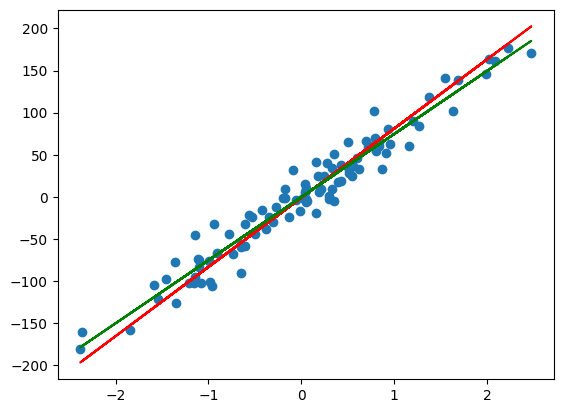

In [206]:
plt.scatter(x, y)
plt.plot(x, custom_predictions, color='red')
plt.plot(x, predictions, color='green')
plt.show()